In [30]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [31]:
# Step 1: Load the Dataset
data = pd.read_csv("creditcard.csv")

In [32]:

X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(227845, 30)

In [35]:
from sklearn.utils import resample

# Step 4: Handle Data Imbalance using Random Sampling
df_train = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
fraud_class = df_train[df_train['Class'] == 1]
non_fraud_class = df_train[df_train['Class'] == 0]

# Upsample minority class
fraud_upsampled = resample(fraud_class, replace=True, n_samples=len(non_fraud_class), random_state=42)

# Combine majority class with upsampled minority class
df_train_resampled = pd.concat([non_fraud_class, fraud_upsampled])

# Split resampled data into features and target variable
X_train_resampled = df_train_resampled.drop('Class', axis=1)
y_train_resampled = df_train_resampled['Class']


In [36]:
X_train_resampled.shape

(454902, 30)

In [37]:
from sklearn.preprocessing import MinMaxScaler
# Step 5: Feature Extraction using Chi-Square
scaler = MinMaxScaler()  # Create a MinMaxScaler object
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)  # Scale the training data
X_test_scaled = scaler.transform(X_test)  # Scale the test data


In [38]:
feature_selector = SelectKBest(chi2, k=10)  # Select top 10 features (you can adjust the value of k)
X_train_selected = feature_selector.fit_transform(X_train_resampled_scaled, y_train_resampled)
X_test_selected = feature_selector.transform(X_test_scaled)


In [39]:
from sklearn.linear_model import LogisticRegression
# Step 5: Train the Logistic Regression Classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_selected, y_train_resampled)

LogisticRegression()

In [40]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import joblib


In [41]:
# Load the trained model
joblib.dump(lr_classifier, 'lr_classifier.pkl')
model = joblib.load('lr_classifier.pkl')


In [42]:
# Load the testing data

testing_data = X_test.copy()
testing_data.to_csv('testing_data.csv', index=False)
testing_data = pd.read_csv('testing_data.csv')


In [53]:
# Create a Tkinter window
window = tk.Tk()
window.title("Fraud Detection")
window.geometry("400x300")

''

In [54]:
# Style for the labels and buttons
style = ttk.Style()
style.configure('TLabel', font=('Helvetica', 12))
style.configure('TButton', font=('Helvetica', 12))

In [55]:

# Create a label for the title
title_label = ttk.Label(window, text="Fraud Detection using SMOTE_LR", style="TLabel")
title_label.pack(pady=10)


In [56]:

def detect_fraud():
    # Get the transaction index from the entry field
    index = int(entry.get())

    # Retrieve the transaction data from the testing data
    transaction_data = testing_data.iloc[index]

    # Scale the transaction data
    transaction_data_scaled = scaler.transform([transaction_data])

    # Select the features using the feature selector
    transaction_data_selected = feature_selector.transform(transaction_data_scaled)

    # Make a prediction using the logistic regression classifier
    prediction = lr_classifier.predict(transaction_data_selected)

    # Update the result label
    if prediction == 0:
        result_label.config(text="Not Fraudulent", foreground="green")
    else:
        result_label.config(text="Fraudulent", foreground="red")

    # Display a message box with the result
    messagebox.showinfo("Fraud Detection", f"The transaction at index {index} is {result_label.cget('text')}.")


# Create a label for the entry field
entry_label = ttk.Label(window, text="Enter Transaction Index:", style="TLabel")
entry_label.pack()

# Create an entry field to input the transaction index
entry = ttk.Entry(window, font=('Helvetica', 12))
entry.pack(pady=5)

# Create a button to detect fraud
detect_button = ttk.Button(window, text="Detect transaction Type", style="TButton", command=detect_fraud)
detect_button.pack(pady=10)

# Create a label to display the result
result_label = ttk.Label(window, text="", style="TLabel")
result_label.pack()

# Run the Tkinter event loop
window.mainloop()



c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [57]:
# Step 8: Evaluate the Model (Optional)
y_pred = lr_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Recall: ',recall_score(y_test, y_pred))

print('Precision:',precision_score(y_test, y_pred) )
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix for SVM:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))



Accuracy: 0.97631754503002
Recall:  0.9081632653061225
Precision: 0.0622813156053184
F1 Score:  0.11656843483955467
Confusion Matrix for SVM:
 [[55524  1340]
 [    9    89]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



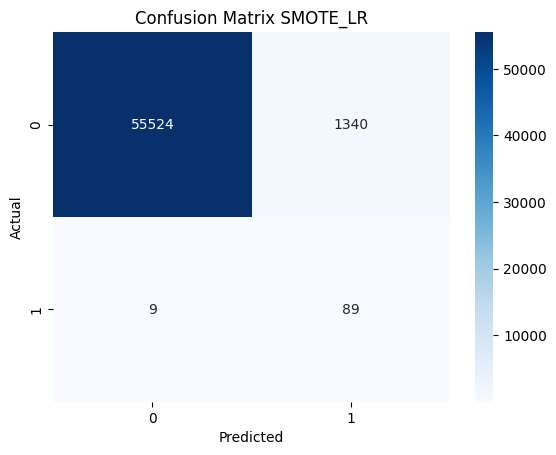

In [58]:

cm = confusion_matrix(y_test, y_pred)
    # Create a heatmap of the confusion matrix with a color map
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)

    # Set the axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix SMOTE_LR')

    # Show the plot
plt.show()

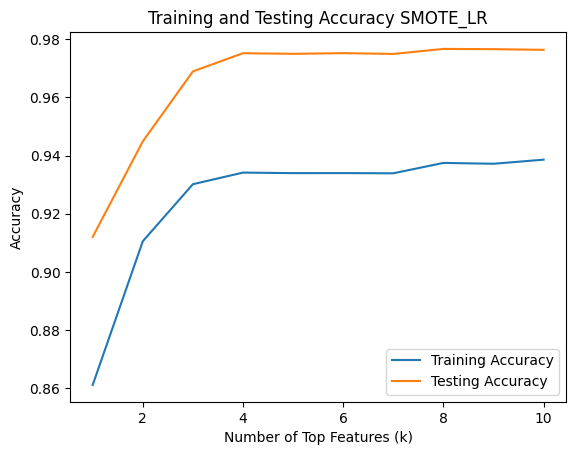

In [59]:
import matplotlib.pyplot as plt
# Step 9: Plot Training and Testing Accuracy Graph
train_accuracy = []
test_accuracy = []
k_values = range(1, 11)  # Vary the number of top features (k) for plotting

for k in k_values:
    # Feature Extraction using Chi-Square
    feature_selector = SelectKBest(chi2, k=k)
    X_train_selected = feature_selector.fit_transform(X_train_resampled_scaled, y_train_resampled)
    X_test_selected = feature_selector.transform(X_test_scaled)
    
    # Train the SVM Classifier
    lr_classifier.fit(X_train_selected, y_train_resampled)
    
    # Calculate Training Accuracy
    y_train_pred = lr_classifier.predict(X_train_selected)
    train_acc = accuracy_score(y_train_resampled, y_train_pred)
    train_accuracy.append(train_acc)
    
    # Calculate Testing Accuracy
    y_test_pred = lr_classifier.predict(X_test_selected)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)

# Plotting the Accuracy Graph
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Top Features (k)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy SMOTE_LR')
plt.legend()
plt.show()

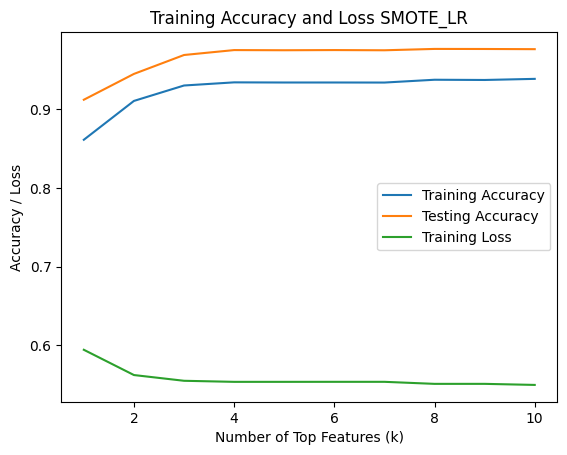

In [60]:
import matplotlib.pyplot as plt
import numpy as np
# Step 9: Plot Training and Testing Accuracy Graph
train_accuracy = []
test_accuracy = []
train_loss = []
k_values = range(1, 11)  # Vary the number of top features (k) for plotting

for k in k_values:
    # Feature Extraction using Chi-Square
    feature_selector = SelectKBest(chi2, k=k)
    X_train_selected = feature_selector.fit_transform(X_train_resampled_scaled, y_train_resampled)
    X_test_selected = feature_selector.transform(X_test_scaled)
    
    # Train the SVM Classifier
    lr_classifier.fit(X_train_selected, y_train_resampled)
    
    # Calculate Training Accuracy
    y_train_pred = lr_classifier.predict(X_train_selected)
    train_acc = accuracy_score(y_train_resampled, y_train_pred)
    train_accuracy.append(train_acc)
    
    # Calculate Testing Accuracy
    y_test_pred = lr_classifier.predict(X_test_selected)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)

    hinge_loss = 1 - y_train_resampled * y_train_pred
    hinge_loss[hinge_loss < 0] = 0  # Set negative losses to 0
    avg_loss = np.mean(hinge_loss)
    train_loss.append(avg_loss)

# Plotting the Accuracy Graph
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.plot(k_values, train_loss, label='Training Loss')
plt.xlabel('Number of Top Features (k)')
plt.ylabel('Accuracy / Loss')
plt.title('Training Accuracy and Loss SMOTE_LR')

plt.legend()
plt.show()